In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheet_name=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

C:\Users\Kaleb\anaconda3\envs\mec-miniprojects\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [3]:
df_offers["offer_id"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype=int64)

In [4]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheet_name=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

C:\Users\Kaleb\anaconda3\envs\mec-miniprojects\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


In [5]:
df_transactions["customer_name"].unique()

array(['Smith', 'Johnson', 'Williams', 'Brown', 'Jones', 'Miller',
       'Davis', 'Garcia', 'Rodriguez', 'Wilson', 'Martinez', 'Anderson',
       'Taylor', 'Thomas', 'Hernandez', 'Moore', 'Martin', 'Jackson',
       'Thompson', 'White', 'Lopez', 'Lee', 'Gonzalez', 'Harris', 'Clark',
       'Lewis', 'Robinson', 'Walker', 'Perez', 'Hall', 'Young', 'Allen',
       'Sanchez', 'Wright', 'King', 'Scott', 'Green', 'Baker', 'Adams',
       'Nelson', 'Hill', 'Ramirez', 'Campbell', 'Mitchell', 'Roberts',
       'Carter', 'Phillips', 'Evans', 'Turner', 'Torres', 'Parker',
       'Collins', 'Edwards', 'Stewart', 'Flores', 'Morris', 'Nguyen',
       'Murphy', 'Rivera', 'Cook', 'Rogers', 'Morgan', 'Peterson',
       'Cooper', 'Reed', 'Bailey', 'Bell', 'Gomez', 'Kelly', 'Howard',
       'Ward', 'Cox', 'Diaz', 'Richardson', 'Wood', 'Watson', 'Brooks',
       'Bennett', 'Gray', 'James', 'Reyes', 'Cruz', 'Hughes', 'Price',
       'Myers', 'Long', 'Foster', 'Sanders', 'Ross', 'Morales', 'Powell',
      

In [6]:
df_transactions.groupby("customer_name").get_group("Adams")

,customer_name,offer_id,n
127,Adams,18,1
128,Adams,29,1
129,Adams,30,1


In [7]:
df_transactions = df_transactions.pivot(index="offer_id", columns="customer_name",
                                        values='n').reset_index()
df_transactions.fillna(0, inplace=True)
df_transactions

customer_name,offer_id,Adams,Allen,Anderson,Bailey,Baker,Barnes,Bell,Bennett,Brooks,...,Turner,Walker,Ward,Watson,White,Williams,Wilson,Wood,Wright,Young
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6,7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,10,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
df = df_offers.merge(df_transactions, on="offer_id")
df

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,Adams,Allen,Anderson,...,Turner,Walker,Ward,Watson,White,Williams,Wilson,Wood,Wright,Young
0,1,January,Malbec,72,56,France,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,January,Pinot Noir,72,17,France,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,February,Espumante,144,32,Oregon,True,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,February,Champagne,72,48,France,True,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,March,Prosecco,144,86,Chile,False,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6,7,March,Prosecco,6,40,Australia,True,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,March,Espumante,6,45,South Africa,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,9,April,Chardonnay,144,57,Chile,False,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,10,April,Prosecco,72,52,California,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
'''
- I believe that lower values of SS is better because the distances are between
data points are minimized

- Optimal K looks to be about K=12

- Challenges I experienced was how to find the elbow of the plot

'''

'\n- I believe that lower values of SS is better because the distances are between\ndata points are minimized\n\n-\n\n'

In [10]:
names = df_transactions.drop(['offer_id'],axis=1).columns.to_numpy()
names

array(['Adams', 'Allen', 'Anderson', 'Bailey', 'Baker', 'Barnes', 'Bell',
       'Bennett', 'Brooks', 'Brown', 'Butler', 'Campbell', 'Carter',
       'Clark', 'Collins', 'Cook', 'Cooper', 'Cox', 'Cruz', 'Davis',
       'Diaz', 'Edwards', 'Evans', 'Fisher', 'Flores', 'Foster', 'Garcia',
       'Gomez', 'Gonzalez', 'Gray', 'Green', 'Gutierrez', 'Hall',
       'Harris', 'Hernandez', 'Hill', 'Howard', 'Hughes', 'Jackson',
       'James', 'Jenkins', 'Johnson', 'Jones', 'Kelly', 'King', 'Lee',
       'Lewis', 'Long', 'Lopez', 'Martin', 'Martinez', 'Miller',
       'Mitchell', 'Moore', 'Morales', 'Morgan', 'Morris', 'Murphy',
       'Myers', 'Nelson', 'Nguyen', 'Ortiz', 'Parker', 'Perez', 'Perry',
       'Peterson', 'Phillips', 'Powell', 'Price', 'Ramirez', 'Reed',
       'Reyes', 'Richardson', 'Rivera', 'Roberts', 'Robinson',
       'Rodriguez', 'Rogers', 'Ross', 'Russell', 'Sanchez', 'Sanders',
       'Scott', 'Smith', 'Stewart', 'Sullivan', 'Taylor', 'Thomas',
       'Thompson', 'Torres', 

In [11]:
x_cols = df_transactions[names].to_numpy()
x_cols

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

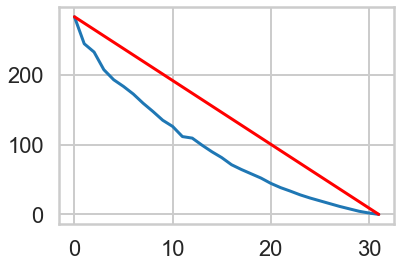

In [13]:
import numpy as np
from sklearn.cluster import KMeans

values = []
for k in range(1,33):
    kmeans = KMeans(n_clusters=k).fit(x_cols)
    values.append(-kmeans.score(x_cols))
x = np.linspace(0, 31, 32)
m = (values[-1] - values[0])/(len(values)-1)
c = values[0]+m
y = m*(x-1)+c
plt.plot(values)
plt.plot(x, y, '-r', label=f'y={m:.2f}x+{c:.2f}')

In [17]:
kmeans = KMeans(n_clusters=12)
label = kmeans.fit_predict(x_cols)
label

array([ 0,  3,  1, 10, 10,  1,  7,  6,  0,  1, 10,  1,  1,  2,  2, 10,  3,
        5,  1, 10,  1,  8,  2,  3, 10,  3,  1,  1,  9,  4, 11, 10])

(array([2., 9., 3., 4., 1., 1., 1., 1., 1., 1., 8.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 11 artists>)

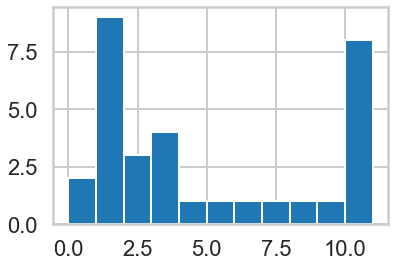

In [27]:
plt.hist(label,bins=11,range=[0,11])

For n_clusters = 2 The average silhouette_score is : 0.2057932700259008
For n_clusters = 3 The average silhouette_score is : 0.09831668348799028
For n_clusters = 4 The average silhouette_score is : 0.03687944952270586
For n_clusters = 5 The average silhouette_score is : 0.07806345549182615
For n_clusters = 6 The average silhouette_score is : 0.06263611879601791
For n_clusters = 7 The average silhouette_score is : 0.0480389811712191
For n_clusters = 8 The average silhouette_score is : 0.05901269722341369
For n_clusters = 9 The average silhouette_score is : 0.04489003753688993
For n_clusters = 10 The average silhouette_score is : 0.03225314126566413
For n_clusters = 11 The average silhouette_score is : 0.03774861290088147
For n_clusters = 12 The average silhouette_score is : 0.036425402206419044
For n_clusters = 13 The average silhouette_score is : 0.042057673216331366
For n_clusters = 14 The average silhouette_score is : 0.051313758104900783
For n_clusters = 15 The average silhouette_sc

C:\Users\Kaleb\anaconda3\envs\mec-miniprojects\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


For n_clusters = 23 The average silhouette_score is : 0.05448092519606182
For n_clusters = 24 The average silhouette_score is : 0.0509907428102635
For n_clusters = 25 The average silhouette_score is : 0.050216855095057925
For n_clusters = 26 The average silhouette_score is : 0.04364623231765964
For n_clusters = 27 The average silhouette_score is : 0.04546832759330984
For n_clusters = 28 The average silhouette_score is : 0.043469206386208825
For n_clusters = 29 The average silhouette_score is : 0.03943260305455165
For n_clusters = 30 The average silhouette_score is : 0.03372421087897923
For n_clusters = 31 The average silhouette_score is : 0.013361702282931858


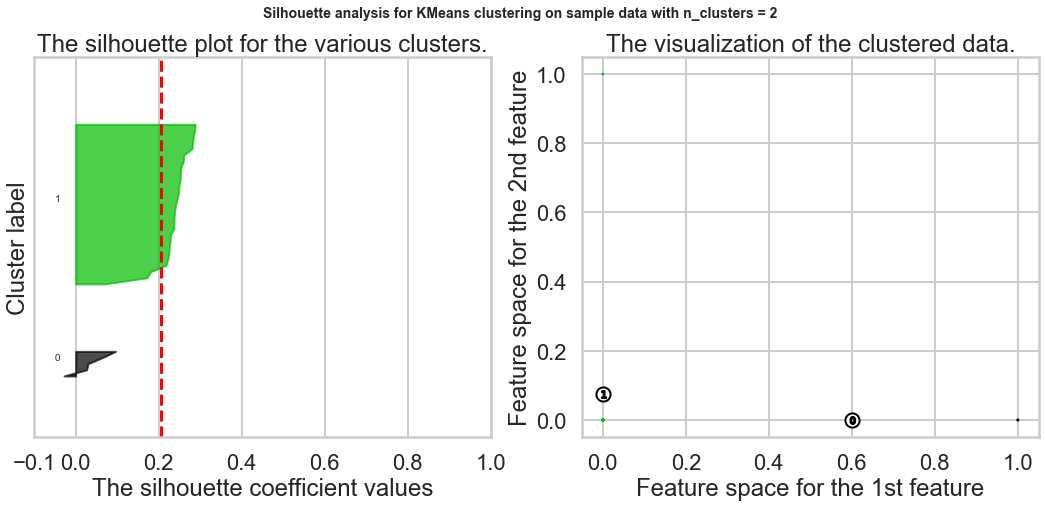

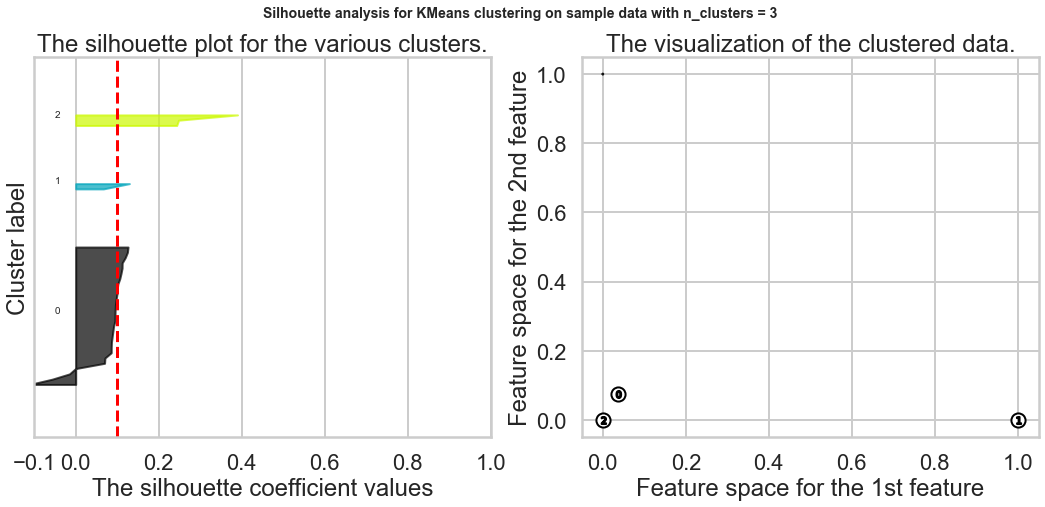

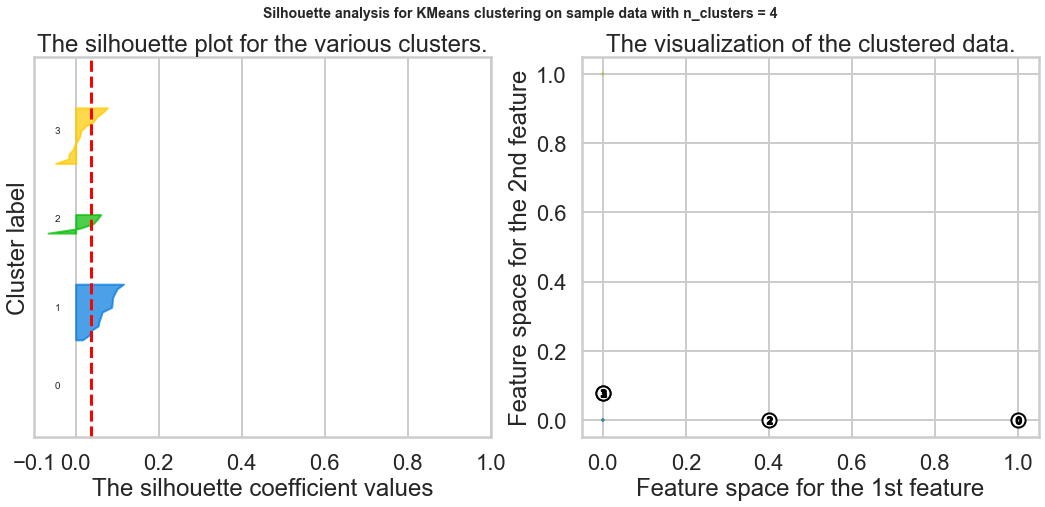

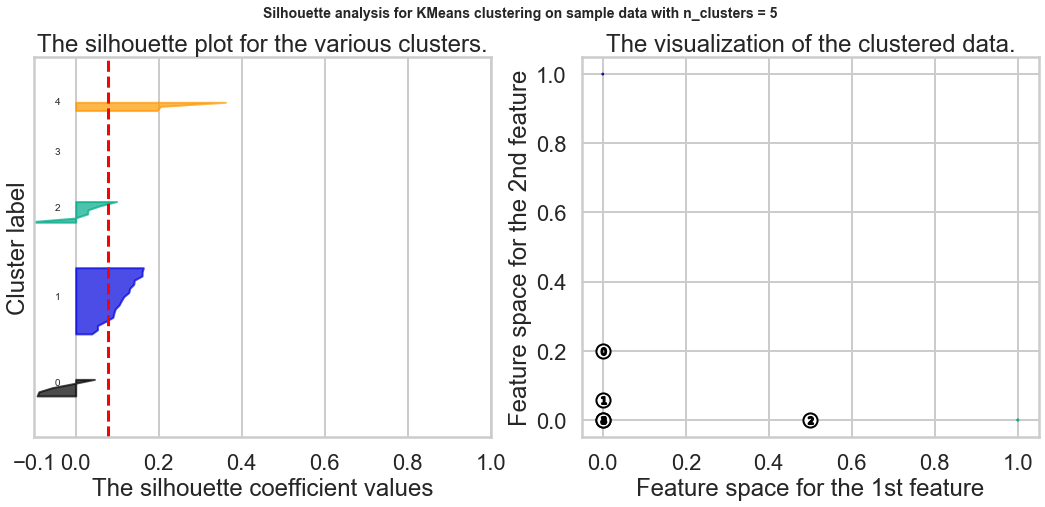

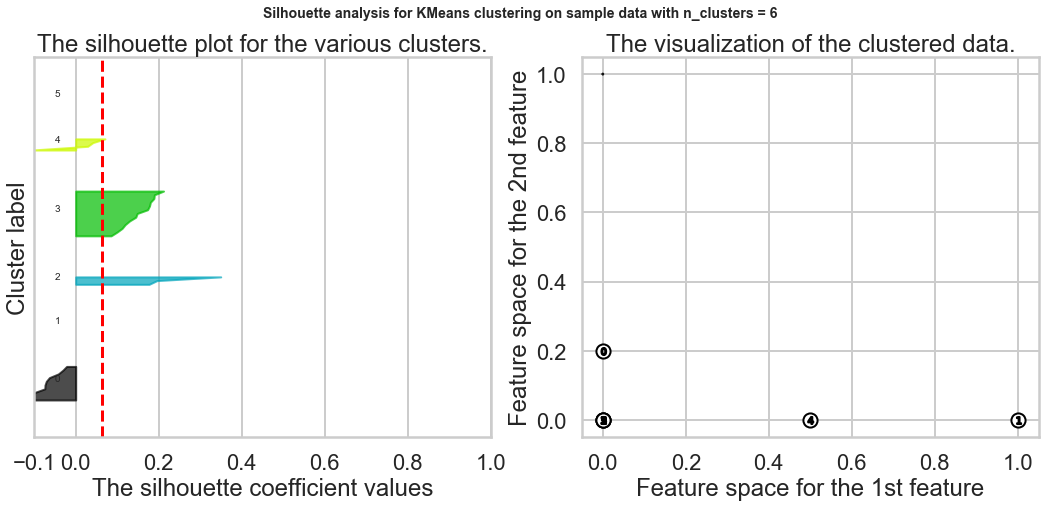

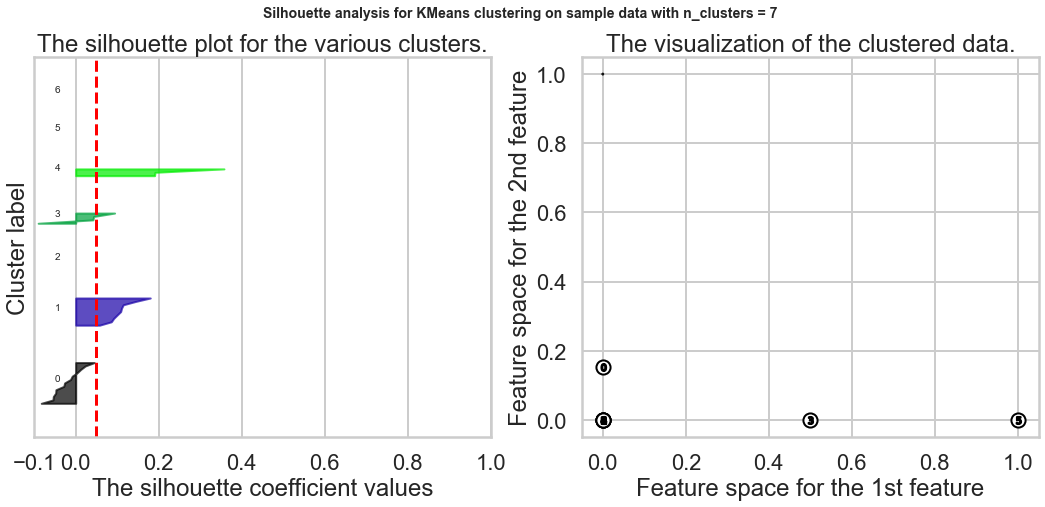

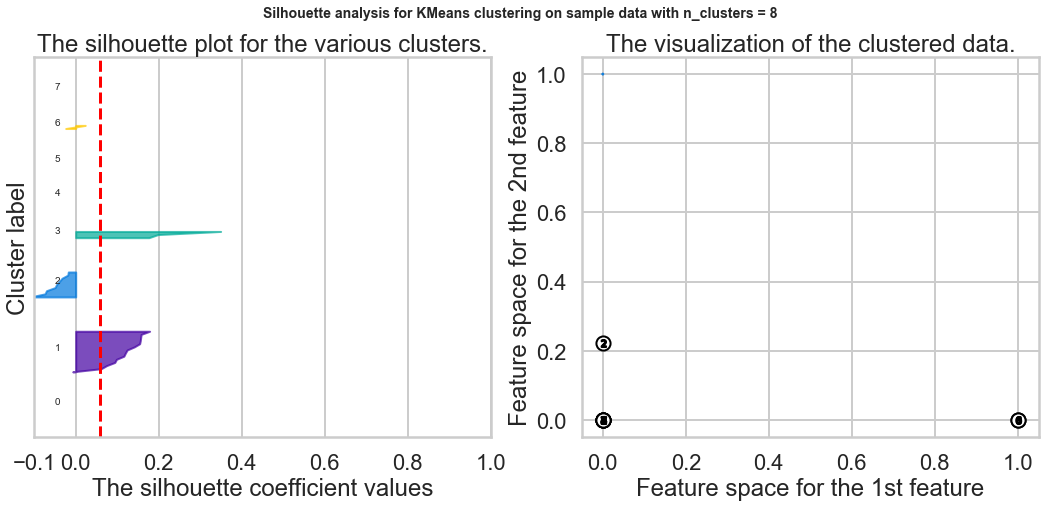

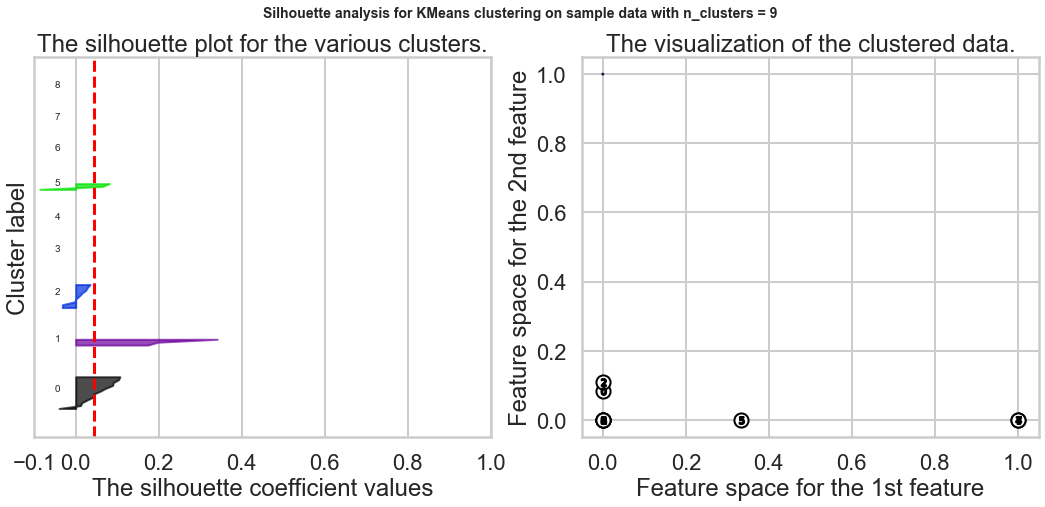

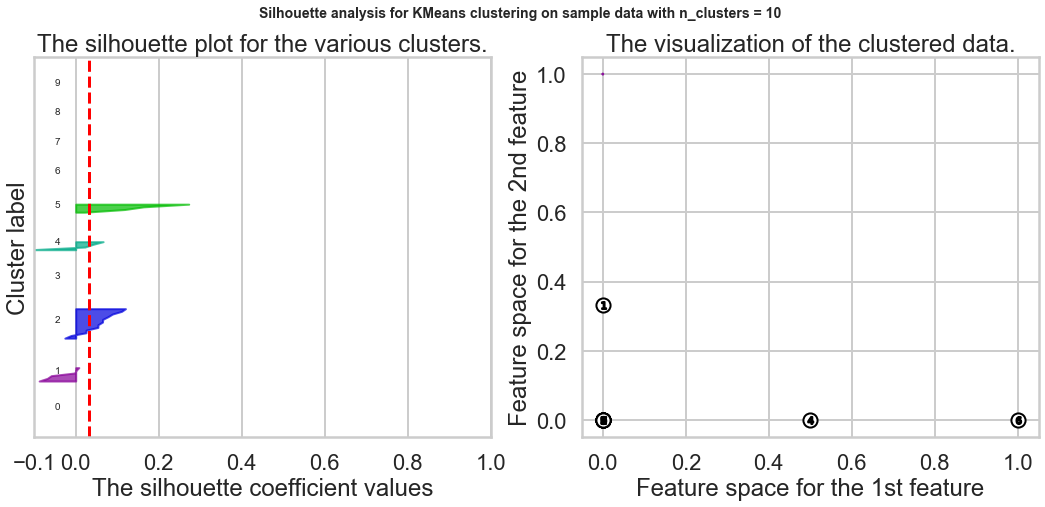

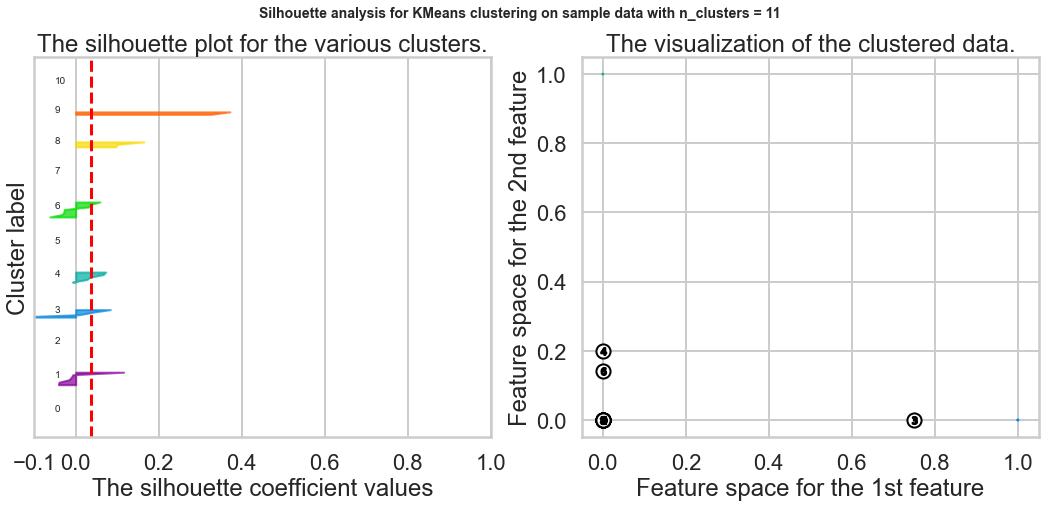

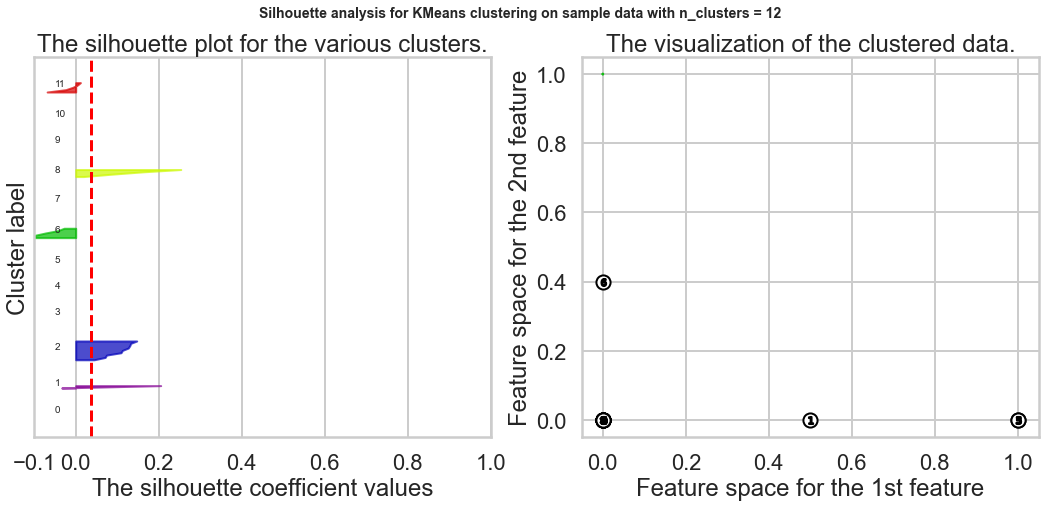

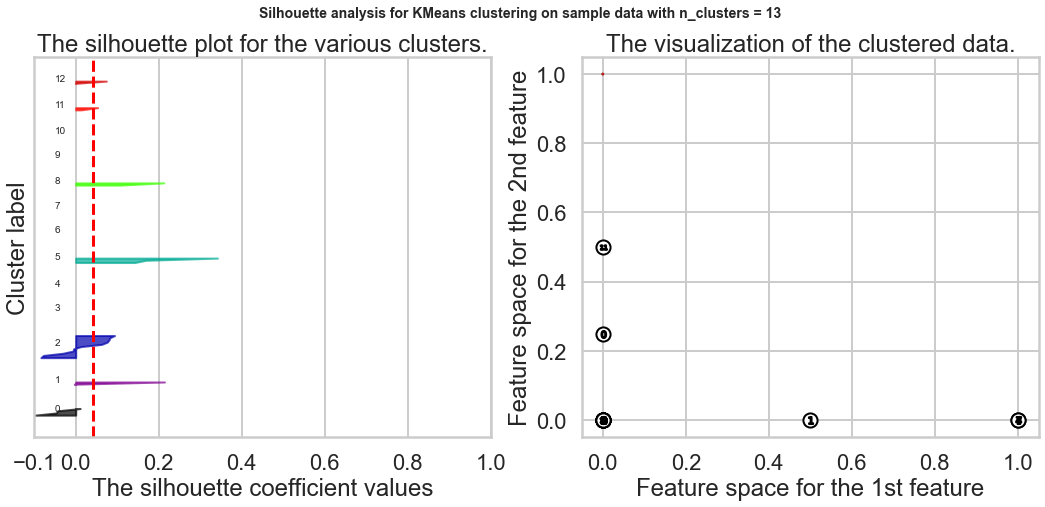

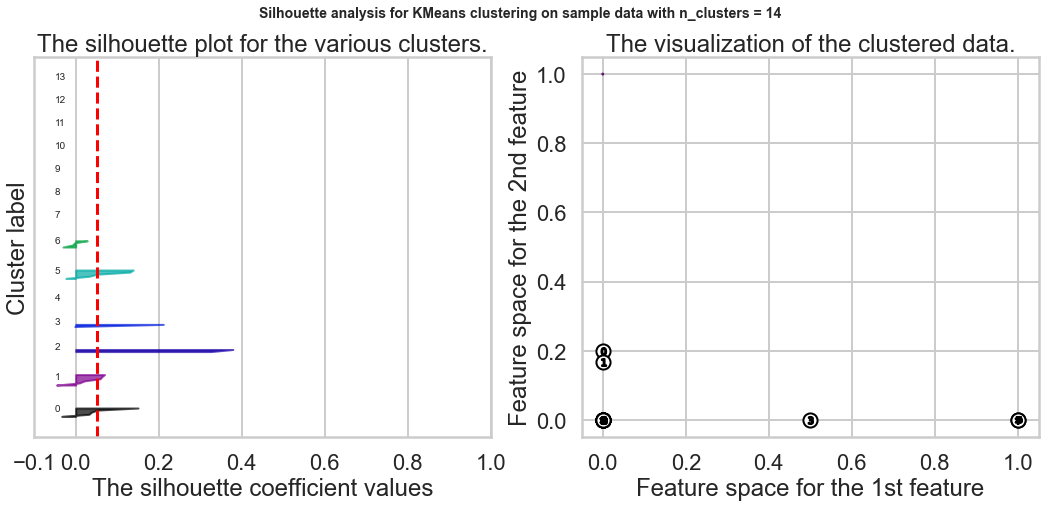

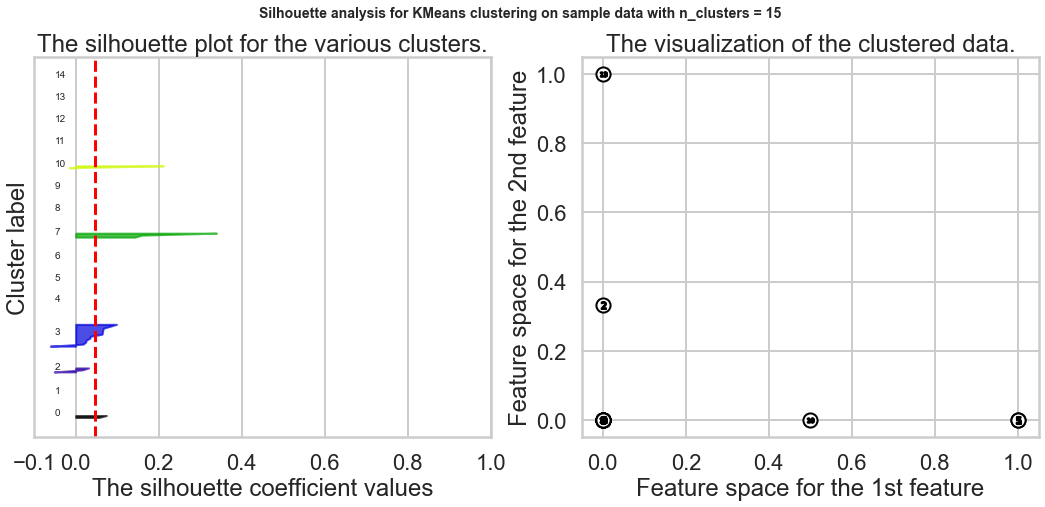

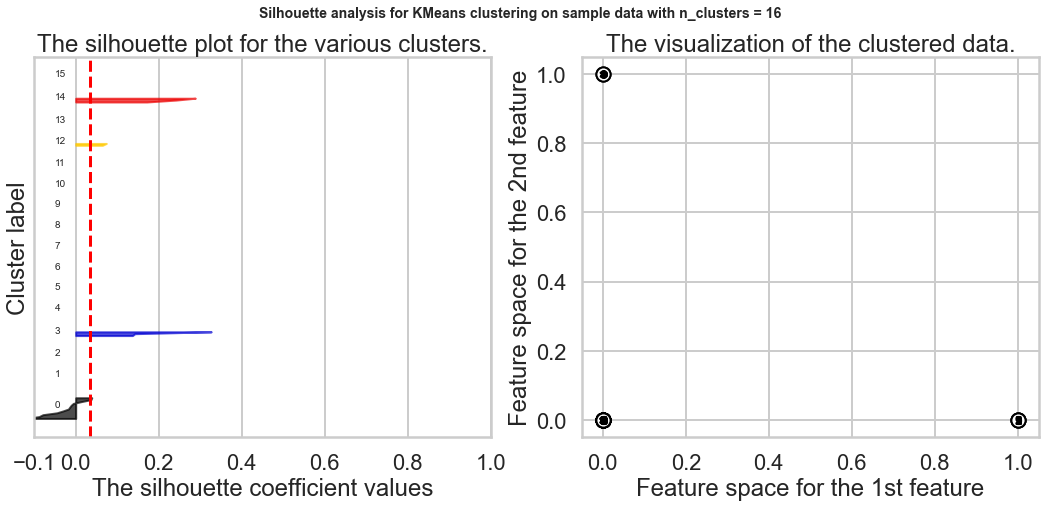

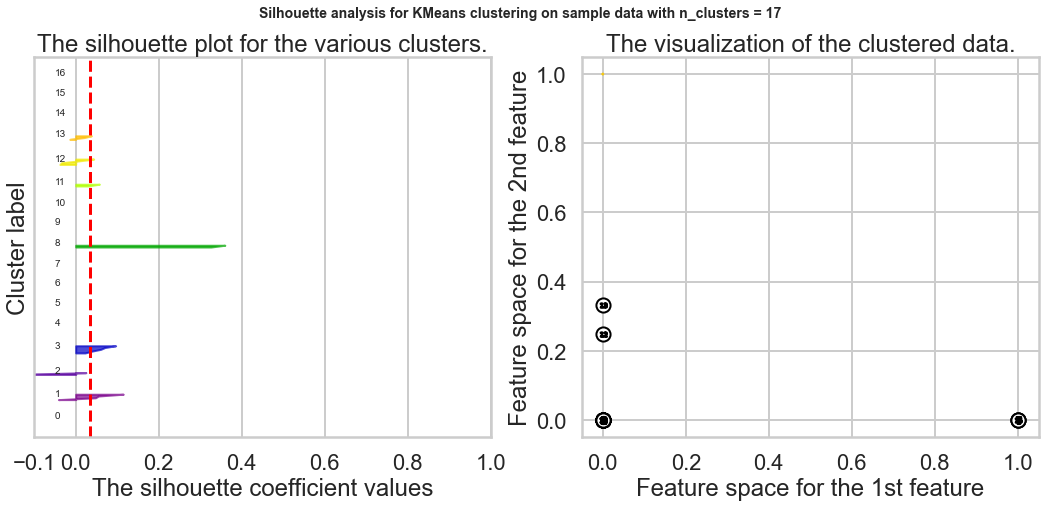

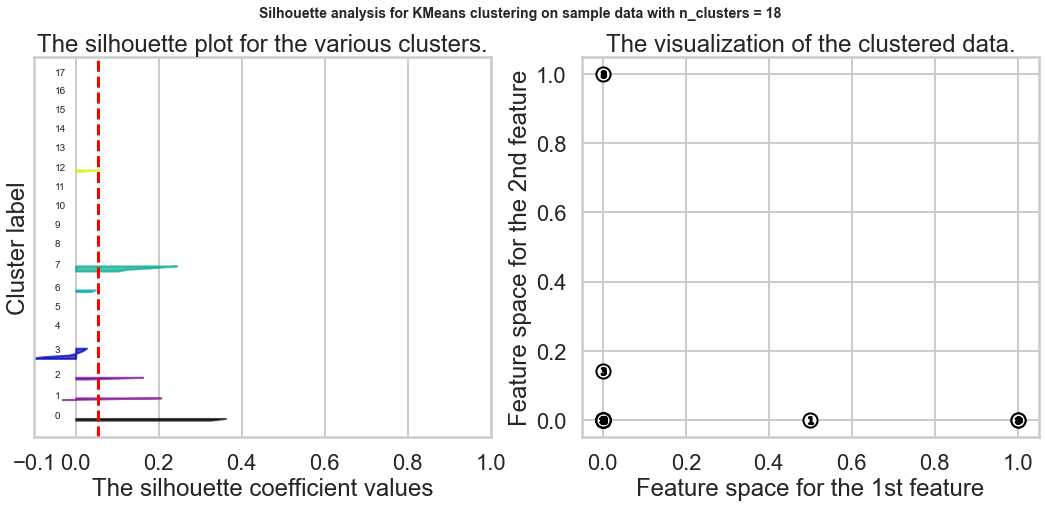

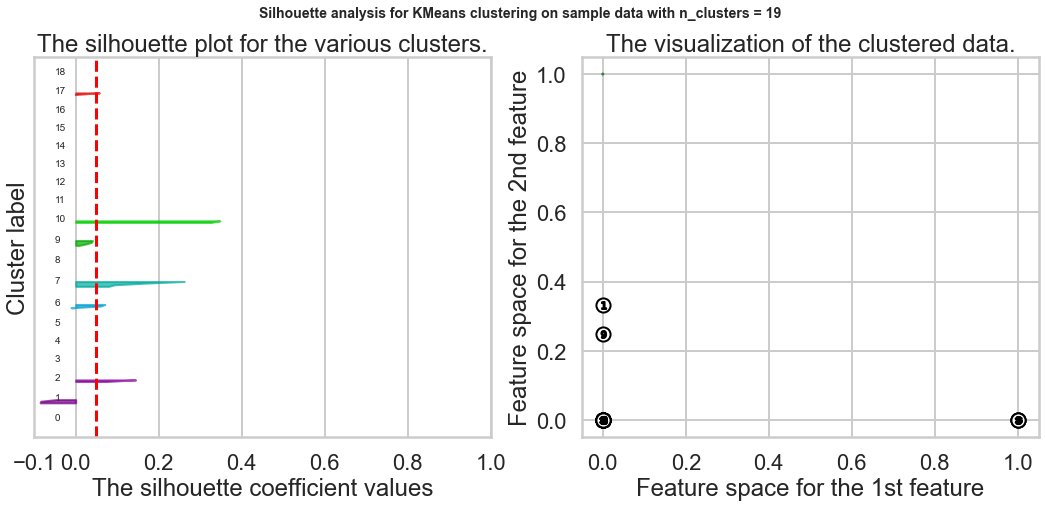

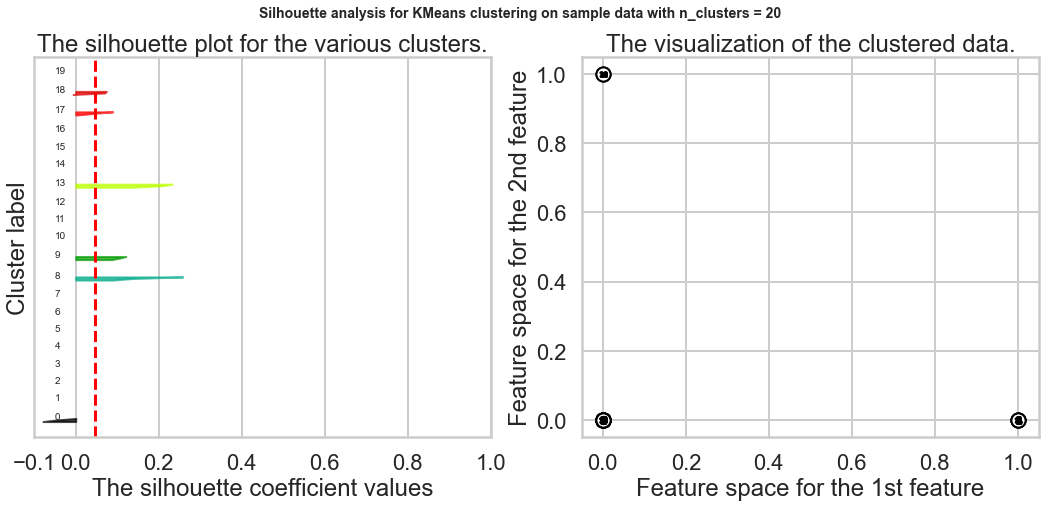

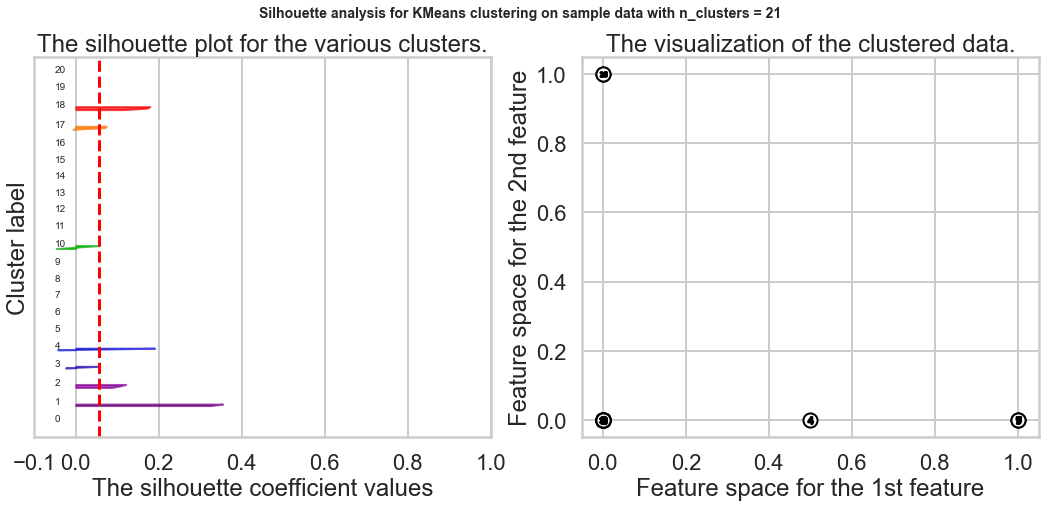

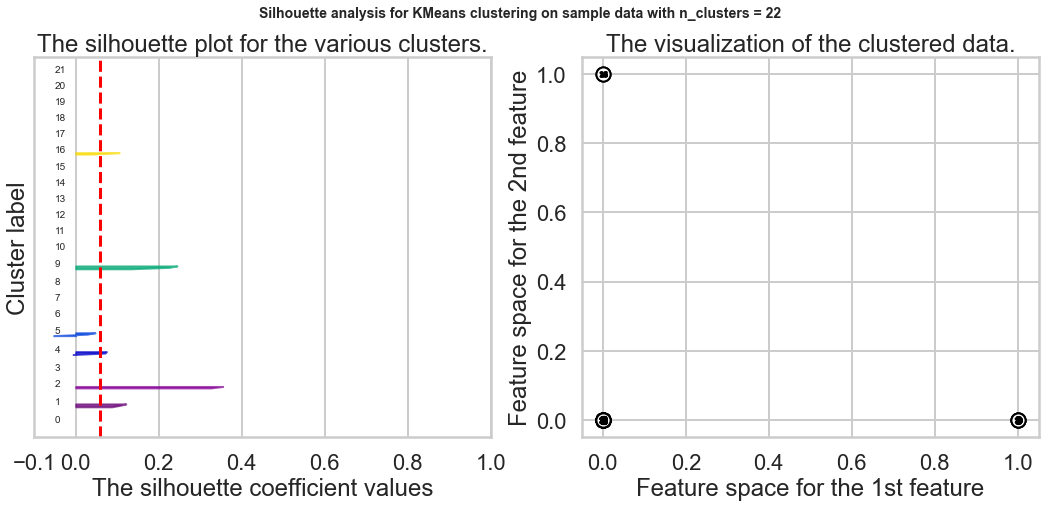

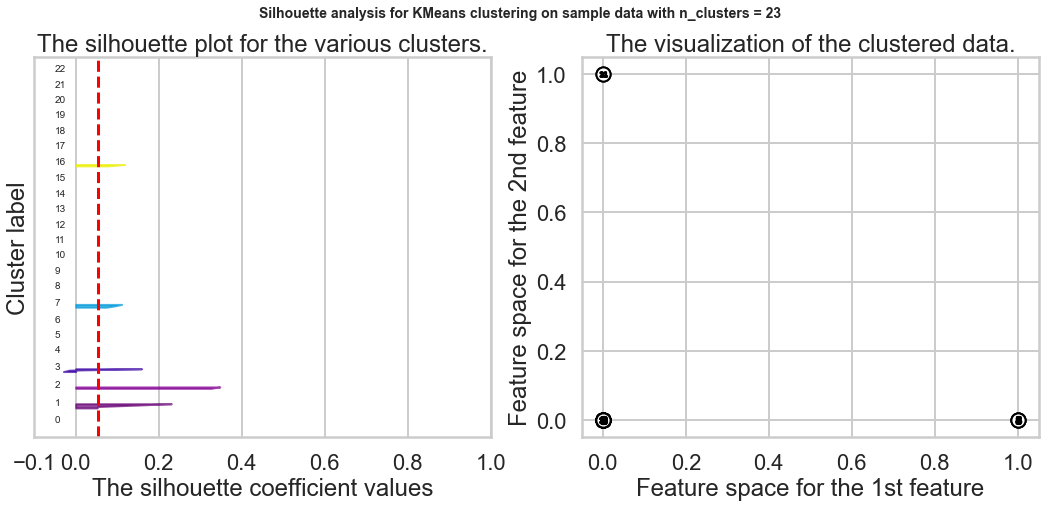

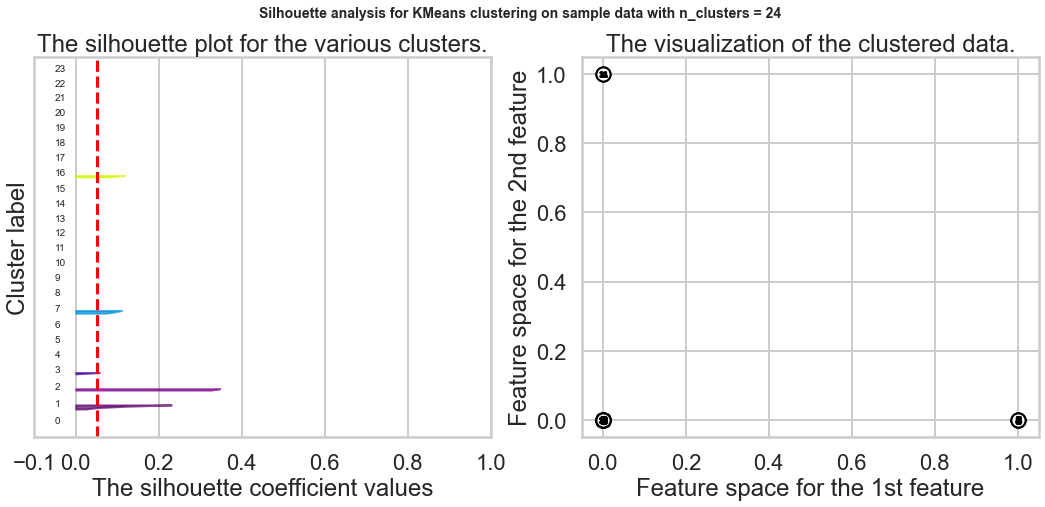

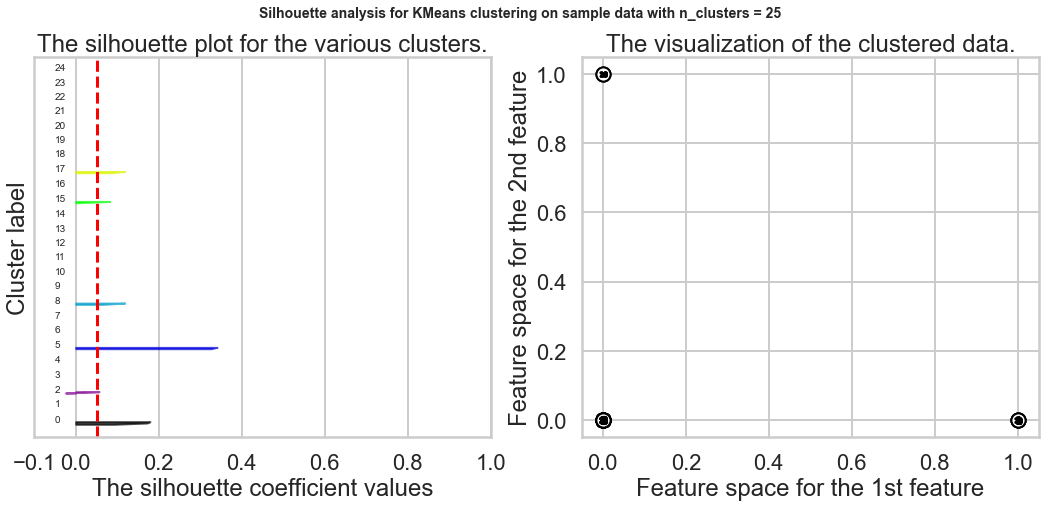

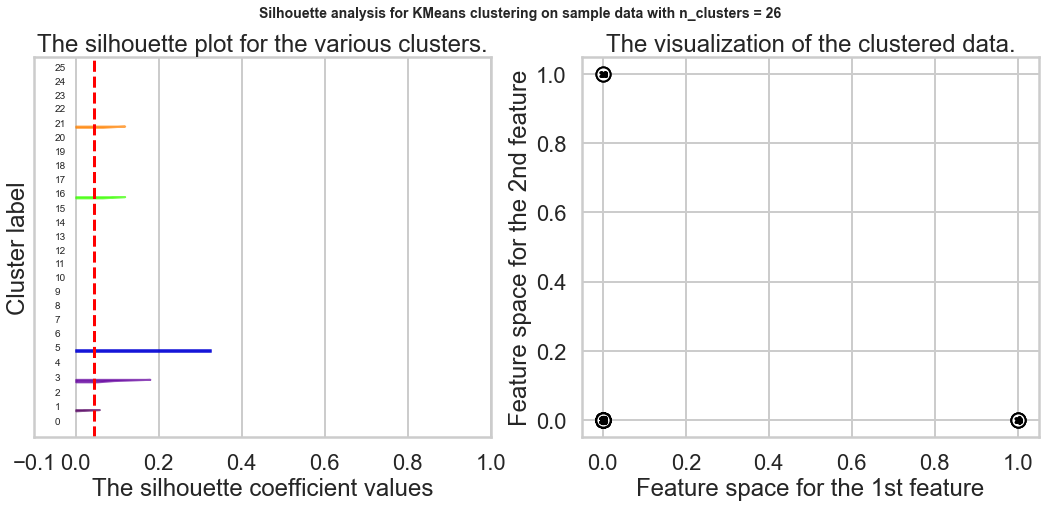

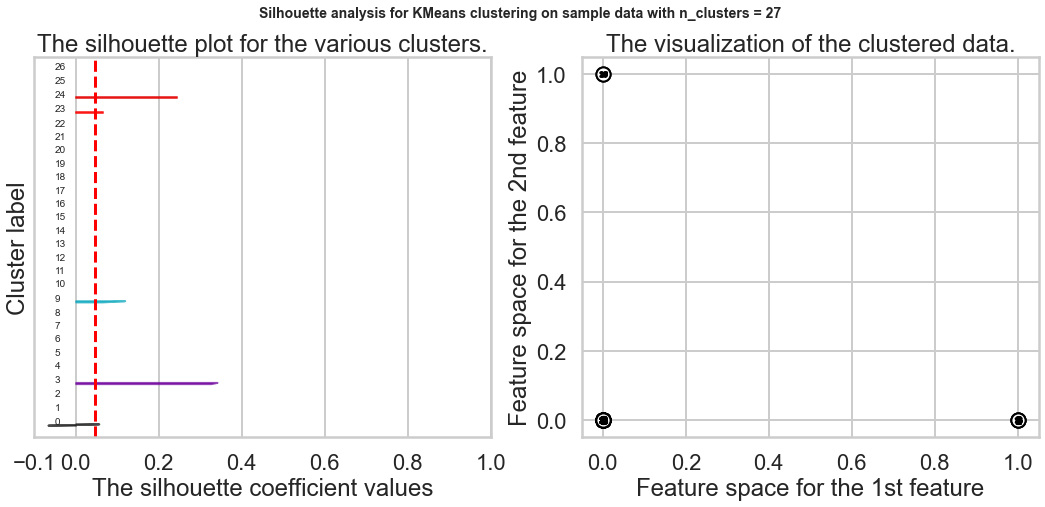

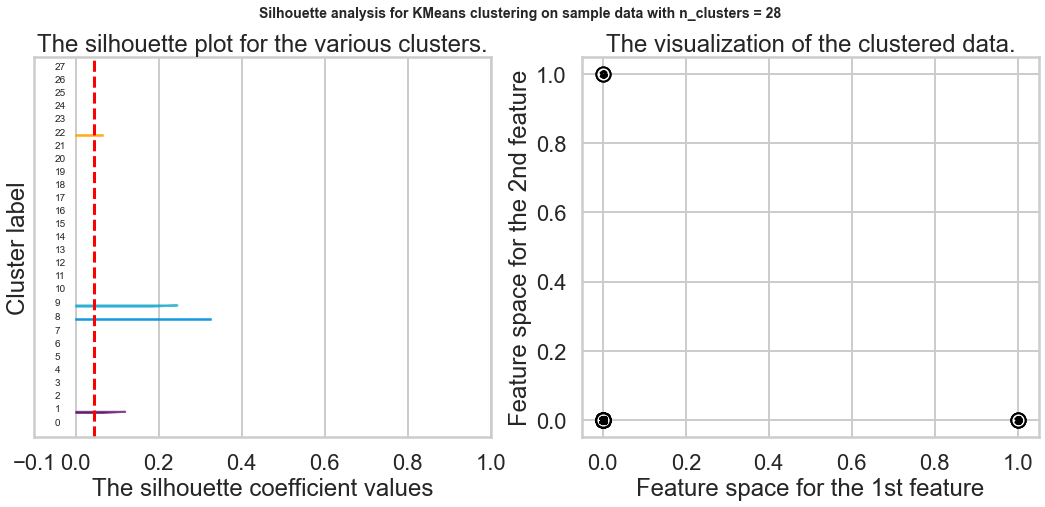

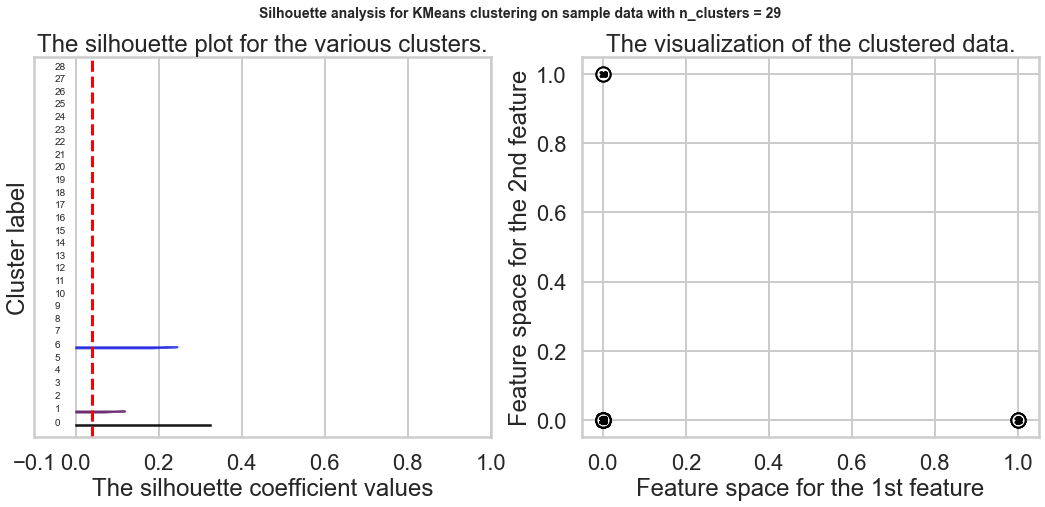

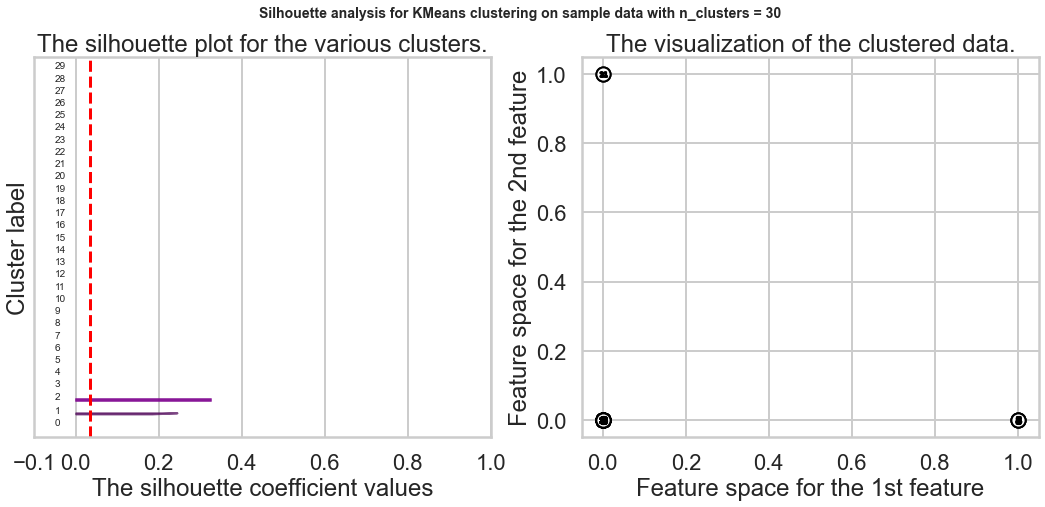

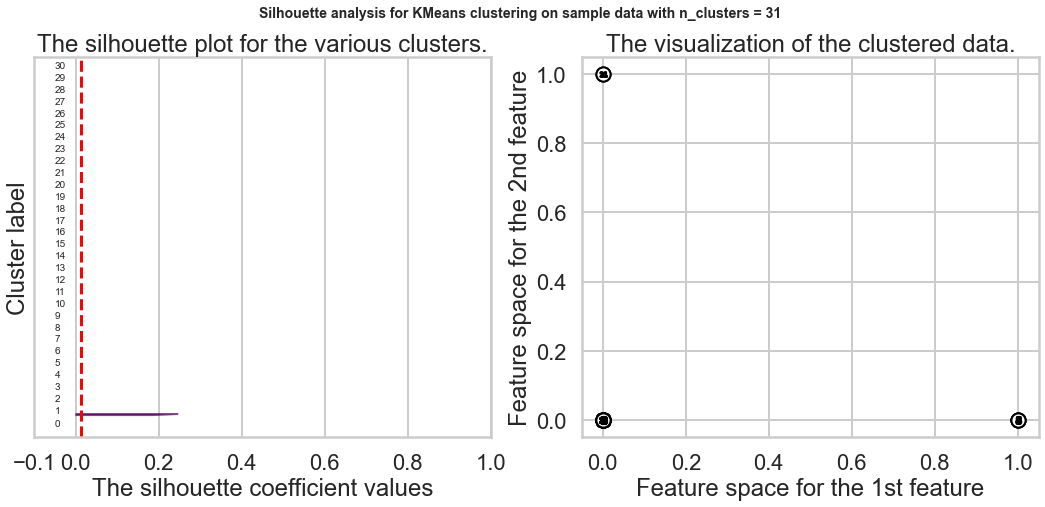

In [34]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

for n_clusters  in range(2,32):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_cols) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_cols)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_cols, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_cols, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        x_cols[:, 0], x_cols[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
plt.show()

In [ ]:
'''
The K value it recommends is 2 which is different compared to the elbow plot
'''